<h1 align="center">Volume 2: The Fourier Transform.</h1>

    Daniel Perkins
    MATH 321
    11/30/23

<h2 align="center">Part 1: The Discrete Fourier Transform</h2>

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft
import IPython
import time

In [3]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

In [4]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1.1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        # Save parameters
        self.rate = rate
        self.samples = samples

    # Problems 1.1 and 1.7
    def plot(self, DFT=False):
        """Plot the graph of the sound wave (time versus amplitude)."""
        # Find total number of seconds
        seconds = len(self.samples) / self.rate
        # Linspace
        time = np.linspace(0, seconds, len(self.samples))

        if DFT: plt.subplot(121)  # If we want two plots
        # Plot the graph of sound wave
        plt.plot(time, self.samples)
        plt.xlim(0, seconds)
        plt.title("Amplitude of the Sound Wave")
        plt.xlabel("Time (seconds)")
        plt.ylim(-32768, 32767)
        plt.ylabel("Samples")
 
        # Plot the DFT
        if DFT:
            c = np.abs(fft(self.samples) / len(self.samples))  # Find coefficients
            k = np.arange(0, len(c))  
            v = self.rate * k / len(self.samples)  # Scale to hz

            # Plot it
            plt.subplot(122)
            plt.ylabel("Magnitude")
            plt.xlabel("Frequency (Hz)")
            plt.ylim(0, max(c) + max(c)/6)
            plt.xlim(-1000, max(v) / 2)   # Only show first half to avoid duplicate
            plt.title("Pitches of the Sound Wave")
            plt.plot(v, c)

        # Show the plot
        plt.tight_layout()
        plt.show()

    # Problem 1.2
    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        # Scale it if not correct type or if force
        if type(self.samples[0]) is not np.int16 or force:
            scaled_samples = np.int16(self.samples / np.max(self.samples) * 32767)
        else:
            scaled_samples = self.samples
        # Write to file
        wavfile.write(filename, self.rate, scaled_samples)

    
    # Problem 1.4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        try:  # See if the samples can be added
            samples = self.samples + other.samples
        except:
            raise ValueError("Samples are not the same length") 
        return SoundWave(self.rate, samples)

    # Problem 1.4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        if self.rate != other.rate:  # if rates not equal
            raise ValueError("Sample rates are not equal")
        # Samples concatenanted
        samples = np.concatenate((self.samples, other.samples))
        return SoundWave(self.rate, samples)
    
    # Problem 2.1
    def __mul__(self, other):
        """Convolve the samples from two SoundWave objects using circular convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.1 Incomplete")

    # Problem 2.2
    def __pow__(self, other):
        """Convolve the samples from two SoundWave objects using linear convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.2 Incomplete")

    # Problem 2.4
    def clean(self, low_freq, high_freq):
        """Remove a range of frequencies from the samples using the DFT. 

        Parameters:
            low_freq (float): Lower bound of the frequency range to zero out.
            high_freq (float): Higher boound of the frequency range to zero out.
        """
        raise NotImplementedError("Problem 2.4 Incomplete")

### Problem 1.1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use the `scipy.io.wavfile.read()` and the `SoundWave` class to plot `tada.wav`.

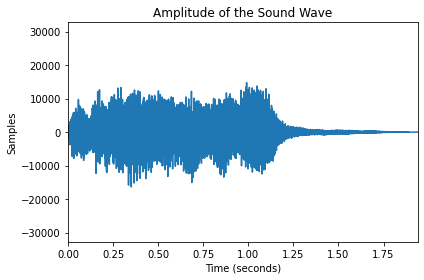

In [5]:
rate, samples = wavfile.read("tada.wav")
sound = SoundWave(rate, samples)
sound.plot()

### Problem 1.2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and new versions of `tada.wav` in the notebook.

In [60]:
IPython.display.Audio(filename="tada.wav")

In [61]:
sound.export("tada_without_scaling.wav", force=False)
IPython.display.Audio(filename="tada_without_scaling.wav")

In [62]:
sound.export("tada_with_scaling.wav", force=True)
IPython.display.Audio(filename="tada_with_scaling.wav")

### Problem 1.3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the notebook.

In [7]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    r = 44100  # Sample Rate
    x = np.linspace(0, duration, int(r * duration))
    f = 32767 * np.sin(2 * np.pi * x * frequency)  # Sine function (Scaled by 32767)
    rate = int(duration * r / duration) # Calculate the rate
    sound = SoundWave(rate, f)  # Create soundwave object
    return sound

In [8]:
soundA = generate_note(440, 2)
soundA.export("note_A.wav")
IPython.display.Audio(filename="note_A.wav")

In [143]:
soundB = generate_note(587.33, 2)
soundB.export("note_B.wav")
IPython.display.Audio(filename="note_B.wav")

### Problem 1.4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the notebook.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A$\,\rightarrow\,$C$\,\rightarrow\,$E, where each tone lasts one second, and embed it in the notebook.

In [9]:
soundA = generate_note(440, 3)
soundC = generate_note(523.25, 3)
soundE = generate_note(659.25, 3)
soundACE = soundA + soundC + soundE
soundACE.export("note_ACE.wav")
IPython.display.Audio(filename="note_ACE.wav")

In [12]:
soundA = generate_note(440, 1)
soundC = generate_note(523.25, 1)
soundE = generate_note(659.25, 1)
soundA_C_E = soundA >> soundC >> soundE
soundA_C_E.export("note_A_C_E.wav")
IPython.display.Audio(filename="note_A_C_E.wav")

### Problem 1.5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- Use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [14]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    # First try
    # n = len(samples)
    # wn = np.exp(2 * np.pi * 1j / n)  # find wn
    # # Find the basis
    # Fn = np.ones((n,n)) # initialize F_n as matrix of ones
    # for column in range(1, n):
    #     for row in range(1, n):  # edit elements that aren't wn
    #         exponent = row * column
    #         Fn[row, column] = 1 / (wn**exponent)
    # c = (1 / n) * Fn @ samples
    # return c
            
    # Optimized version
    n = len(samples)
    wn = [np.exp(2 * np.pi * 1j / n) ** i for i in np.arange(0, n)]  # find wn
    c = [np.dot(wn**-i, samples) / n for i in np.arange(0, n)]  # Calculate c
    return np.array(c)

In [19]:
# Test on small random arrays
x = np.random.random(3)   # Random array of size 3
fftx = fft(x)
myx = simple_dft(x) * len(x)
print("fft: ", fftx)
print("my code: ", myx)
print(np.allclose(fftx, myx))   # Verify if they match

print()

x = np.random.random(6)   # Random array of size 6
fftx = fft(x)
myx = simple_dft(x) * len(x)
print("fft: ", fftx)
print("my code: ", myx)
print(np.allclose(fftx, myx))   # Verify if they match

print()

x = np.random.random(16)  # Random array of size 16
fftx = fft(x)
myx = simple_dft(x) * len(x)
print("fft: ", fftx)
print("my code: ", myx)
print(np.allclose(fftx, myx))   # Verify if they match

# It works!!!!
# print("fft: ", fft(np.array([2,0,2,0])) / 4)

fft:  [ 0.65336285-0.j         -0.12868365+0.35483521j -0.12868365-0.35483521j]
my code:  [ 0.65336285+0.j         -0.12868365+0.35483521j -0.12868365-0.35483521j]
True

fft:  [ 1.82236972-0.j         -0.81642858+0.41197258j  0.52399119+0.32093846j
 -1.1829359 -0.j          0.52399119-0.32093846j -0.81642858-0.41197258j]
my code:  [ 1.82236972+0.00000000e+00j -0.81642858+4.11972580e-01j
  0.52399119+3.20938456e-01j -1.1829359 -1.81342040e-15j
  0.52399119-3.20938456e-01j -0.81642858-4.11972580e-01j]
True

fft:  [ 8.8614177 -0.j          0.32065226+1.66870997j -0.74943395-0.19683087j
 -2.24203126+0.34822269j -1.1390754 +0.45234006j  1.42543341+0.58884674j
 -1.27479008+1.06233285j  1.11250257-0.91473261j -0.29045174-0.j
  1.11250257+0.91473261j -1.27479008-1.06233285j  1.42543341-0.58884674j
 -1.1390754 -0.45234006j -2.24203126-0.34822269j -0.74943395+0.19683087j
  0.32065226-1.66870997j]
my code:  [ 8.8614177 +0.00000000e+00j  0.32065226+1.66870997e+00j
 -0.74943395-1.96830875e-01j -2.2

### Problem 1.6

- Implement `simple_fft()`.
- Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
Print the runtimes of each computation.
- Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [20]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    # Recursive function
    def split(g):
        n = np.size(g)
        if n <= threshold:
            return n * simple_dft(g)  # use previous function for small g
        else:
            even = split(g[::2])    # Get all even entries
            odd = split(g[1::2])    # Get all odd entries
            z = [np.exp(-2 * np.pi * 1j * k / n) for k in np.arange(0, n)]  # Array broadcasting version of 10-11
            m = n // 2 # Get middle index for z
            return np.concatenate((even + z[:m] * odd, even + z[m:] * odd))
    
    # Call the recursive function
    return split(samples) / np.size(samples)

In [30]:
# Test on small random arrays
y = np.random.random(4)
fftx = fft(y)
myfft = simple_fft(y, threshold=1) * len(y)
print("fft: ", fftx)
print("my code: ", myfft)
print(np.allclose(fftx, myfft))   # Verify if they match

print()

y = np.random.random(8)
fftx = fft(y)
myfft = simple_fft(y, threshold=1) * len(y)
print("fft: ", fftx)
print("my code: ", myfft)
print(np.allclose(fftx, myfft))   # Verify if they match

print()

y = np.random.random(16)
fftx = fft(y)
myfft = simple_fft(y, threshold=2) * len(y)
print("fft: ", fftx)
print("my code: ", myfft)
print(np.allclose(fftx, myfft))   # Verify if they match

# IT WORKS!!!!!!!!!!!!

fft:  [ 2.08442084-0.j         -0.12801184-0.10247668j -1.65420155-0.j
 -0.12801184+0.10247668j]
my code:  [ 2.08442084+0.00000000e+00j -0.12801184-1.02476677e-01j
 -1.65420155-2.28924597e-16j -0.12801184+1.02476677e-01j]
True

fft:  [ 4.23674656-0.j         -0.35280896+1.40875766j  0.52202223-0.46245288j
  0.32869067+0.14870203j  1.15964961-0.j          0.32869067-0.14870203j
  0.52202223+0.46245288j -0.35280896-1.40875766j]
my code:  [ 4.23674656+0.00000000e+00j -0.35280896+1.40875766e+00j
  0.52202223-4.62452880e-01j  0.32869067+1.48702027e-01j
  1.15964961-1.88417847e-16j  0.32869067-1.48702027e-01j
  0.52202223+4.62452880e-01j -0.35280896-1.40875766e+00j]
True

fft:  [ 8.6742108 -0.j         -0.38589659+1.73058233j -0.91591304-0.33364761j
  0.47735138+0.55908698j  0.44876671-0.74566161j -0.25696818+0.23559124j
  1.02096992+0.48097235j  0.15435215-0.85784975j -1.1824805 -0.j
  0.15435215+0.85784975j  1.02096992-0.48097235j -0.25696818-0.23559124j
  0.44876671+0.74566161j  0.4773513

In [317]:
# Time the algorithms on large array
y = np.random.random(8192)

# Or Jupiter Method of calculating time
print("_____My Original Fourier Transform Function_____")
%time simple_dft(y)
print()

print("_____My Fast Fourier Transform Function_____")
%time simple_fft(y)
print()

print("_____Scipy implementation_____")
%time fft(y)


_____My Original Fourier Transform Function_____
CPU times: user 15 s, sys: 0 ns, total: 15 s
Wall time: 16.2 s

_____My Fast Fourier Transform Function_____
CPU times: user 522 ms, sys: 0 ns, total: 522 ms
Wall time: 565 ms

_____Scipy implementation_____
CPU times: user 372 µs, sys: 0 ns, total: 372 µs
Wall time: 331 µs


array([4076.90603473 -0.j        ,  -13.64102602-24.72801948j,
        -19.71889603 -5.00567935j, ...,  -33.57983581-11.80977181j,
        -19.71889603 +5.00567935j,  -13.64102602+24.72801948j])

### Problem 1.7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of an A tone.
- Display the plot of the DFT of an A minor chord.

A Note


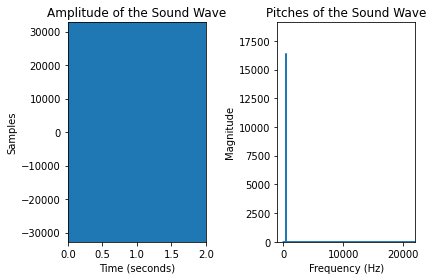

In [377]:
soundA = generate_note(440, 2)

# Plot for A
print("A Note")
soundA.plot(DFT=True)

# The amplitude graph looks ugly since the frequency is so high

A Minor


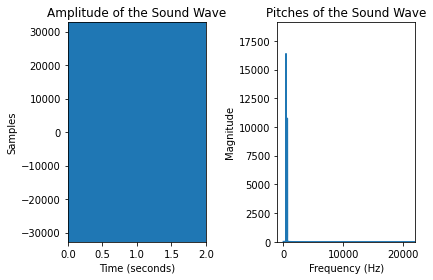

In [378]:
# Plot for A minor
soundC = generate_note(523.25, 2)
soundE = generate_note(659.25, 2)

print("A Minor")
soundACE = soundA + soundC + soundE
soundACE.plot(DFT=True)

# The amplitude graph looks ugly since the frequency is so high

### Problem 1.8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

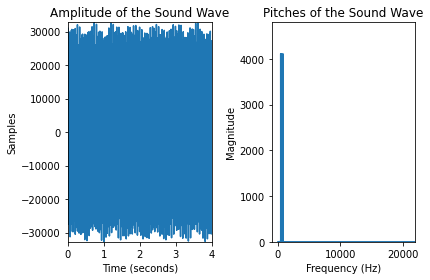

In [374]:
# Plot sound wave and pitch of mystery chord
rate, samples = wavfile.read("mystery_chord.wav")
mystery_sound = SoundWave(rate, samples)
mystery_sound.plot(DFT=True)

# Listen to the sound
IPython.display.Audio(filename="mystery_chord.wav")

In [373]:
c = np.abs(fft(mystery_sound.samples / len(mystery_sound.samples))) # Find coefficients
c = c[:len(c)//2]   # Get rid of second half
k = np.arange(0, len(c))  
v = mystery_sound.rate * k / len(mystery_sound.samples)  # Scale to hz
sorted = np.argsort(c)  # Sort by size
print("Most influential Frequencies")
for i in range(1, 10):   # Print out 9 largest
    print(v[sorted[-i]])

# The only unique frequencies output were A, G, C, and D. So those were the notes
print("The chord was A, G, C, and D")

Most influential Frequencies
440.0
784.0
523.25
587.5
587.25
587.75
587.0
588.0
586.75
The chord was A, G, C, and D


The notes are A, G, C, and D

<h2 align="center">Part 2: Convolution and Filtering.</h2>

### Problem 2.1

- Implement `SoundWave.__mul__()` for circular convolution.
- Generate 2 seconds of white noise at the same sample rate as `tada.wav`.
- Compute the circular convolution of `tada.wav` and the white noise. Embed the result in the notebook.
- Append the circular convolution to itself and embed the result in the notebook.

[ 0.625-0.j     0.125-0.125j -0.125+0.j     0.125+0.125j]


### Problem 2.2

- Implement `SoundWave.__pow__()` for linear convolution.
- Time the linear convolution of `CGC.wav` and `GCG.wav` using `SoundWave.__pow__()` and `scipy.signal.fftconvolve()`.
- Embed the two original sounds and their convolutions in the notebook. Check that the convolutions with `SoundWave.__pow__()` and `scipy.signal.fftconvolve()` sound the same.

### Problem 2.3

Use `SoundWave.__pow__()` or `scipy.signal.fftconvolve()` to compute the linear convolution of `chopin.wav` and `balloon.wav`.
Embed the two original sounds and their convolution in the notebook.

### Problem 2.4

- Implement `SoundWave.clean()`.
- Clean `noisy1.wav` by filtering out frequencies from $1250$-$2600$ Hz. Embed the original and the cleaned versions in the notebook.
- Clean `noisy2.wav`. Embed the original and the cleaned versions in the notebook.

### Problem 2.5

- Clean `vuvuzela.wav` by filtering bad frequencies out of the left and right channels individually.
- Recombine the left and right channels and embed the result in the notebook.

### Problem 2.6

- Clean up `license_plate.png` so that the year printed on the sticker in the bottom right corner of the plate is legible.
- Display the original and cleaned images.

The year on the sticker is...